**Quantitaive Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta

In [2]:
#Stock data source path

AAPL_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\AAPL_historical_data.csv'
AMZN_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\AMZN_historical_data.csv'
GOOG_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\GOOG_historical_data.csv'
META_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\META_historical_data.csv'
MSFT_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\MSFT_historical_data.csv'
NVDA_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\NVDA_historical_data.csv'
TSLA_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\TSLA_historical_data.csv'

#Loading Stock data from csv
try:
    AAPL_df = pd.read_csv(AAPL_path)
    print(f"Data loaded successfully from AAPL")
    AMZN_df = pd.read_csv(AMZN_path)
    print(f"Data loaded successfully from AMZN")
    GOOG_df = pd.read_csv(GOOG_path)
    print(f"Data loaded successfully from GOOG")
    META_df = pd.read_csv(META_path)
    print(f"Data loaded successfully from META")
    MSFT_df = pd.read_csv(MSFT_path)
    print(f"Data loaded successfully from MSFT")
    NVDA_df = pd.read_csv(NVDA_path)
    print(f"Data loaded successfully from NVDA")
    TSLA_df = pd.read_csv(TSLA_path)
    print(f"Data loaded successfully from TSLA")
except FileNotFoundError:
    print(f"Error: The file AAPL_path was not found. Please check the path.")
    print(f"Error: The file AMZN_path was not found. Please check the path.")
    print(f"Error: The file GOOG_path was not found. Please check the path.")
    print(f"Error: The file META_path was not found. Please check the path.")
    print(f"Error: The file MSFT_path was not found. Please check the path.")
    print(f"Error: The file NVDA_path was not found. Please check the path.")
    print(f"Error: The file TSLA_path was not found. Please check the path.")

Data loaded successfully from AAPL
Data loaded successfully from AMZN
Data loaded successfully from GOOG
Data loaded successfully from META
Data loaded successfully from MSFT
Data loaded successfully from NVDA
Data loaded successfully from TSLA


**Date preparation**

In [3]:

AAPL_df['Date']=pd.to_datetime(AAPL_df['Date'])            
AAPL_df.set_index('Date', inplace=True)                #setting Date column as an index
AMZN_df['Date']=pd.to_datetime(AMZN_df['Date'])
AMZN_df.set_index('Date', inplace=True)
GOOG_df['Date']=pd.to_datetime(GOOG_df['Date'])
GOOG_df.set_index('Date', inplace=True)
META_df['Date']=pd.to_datetime(META_df['Date'])
META_df.set_index('Date', inplace=True)
MSFT_df['Date']=pd.to_datetime(MSFT_df['Date'])
MSFT_df.set_index('Date', inplace=True)
NVDA_df['Date']=pd.to_datetime(NVDA_df['Date'])
NVDA_df.set_index('Date', inplace=True)
TSLA_df['Date']=pd.to_datetime(TSLA_df['Date'])
TSLA_df.set_index('Date', inplace=True)

In [4]:
#Drop blank values
NVDA_df.dropna(inplace=True)
TSLA_df.dropna(inplace=True)
MSFT_df.dropna(inplace=True)
META_df.dropna(inplace=True)
GOOG_df.dropna(inplace=True)
AMZN_df.dropna(inplace=True)
AAPL_df.dropna(inplace=True)

**Technical Analysis**

In [5]:
stock_data = {
     "AAPL": AAPL_df,
     "AMZN": AMZN_df,
     "MSFT":MSFT_df,
     "TSLA":TSLA_df,
     "META":META_df,
     "NVDA":NVDA_df,
     "GOOG":GOOG_df,
                   }

for ticker, df in stock_data.items():
    df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
    df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = ta.MACD(
        df['Close'],
        fastperiod=12,
        slowperiod=26,
        signalperiod=9)
    df['Daily_Return'] = df['Close'].pct_change()
    print(f"Finished Computing Technical Indicators for {ticker}")
 # Re-assign the modified DataFrame back to the dictionary
    stock_data[ticker] = df
df

Finished Computing Technical Indicators for AAPL
Finished Computing Technical Indicators for AMZN
Finished Computing Technical Indicators for MSFT
Finished Computing Technical Indicators for TSLA
Finished Computing Technical Indicators for META
Finished Computing Technical Indicators for NVDA
Finished Computing Technical Indicators for GOOG


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_Signal,MACD_Hist,Daily_Return
Date,,,,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.079430
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.010064
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.041408
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.010775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,185.500001,37.434718,-0.034166,1.571016,-1.605182,-0.050272
2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,184.689501,32.279082,-1.106693,1.035474,-2.142167,-0.029879
2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,183.780501,31.843937,-1.972672,0.433845,-2.406517,-0.002838


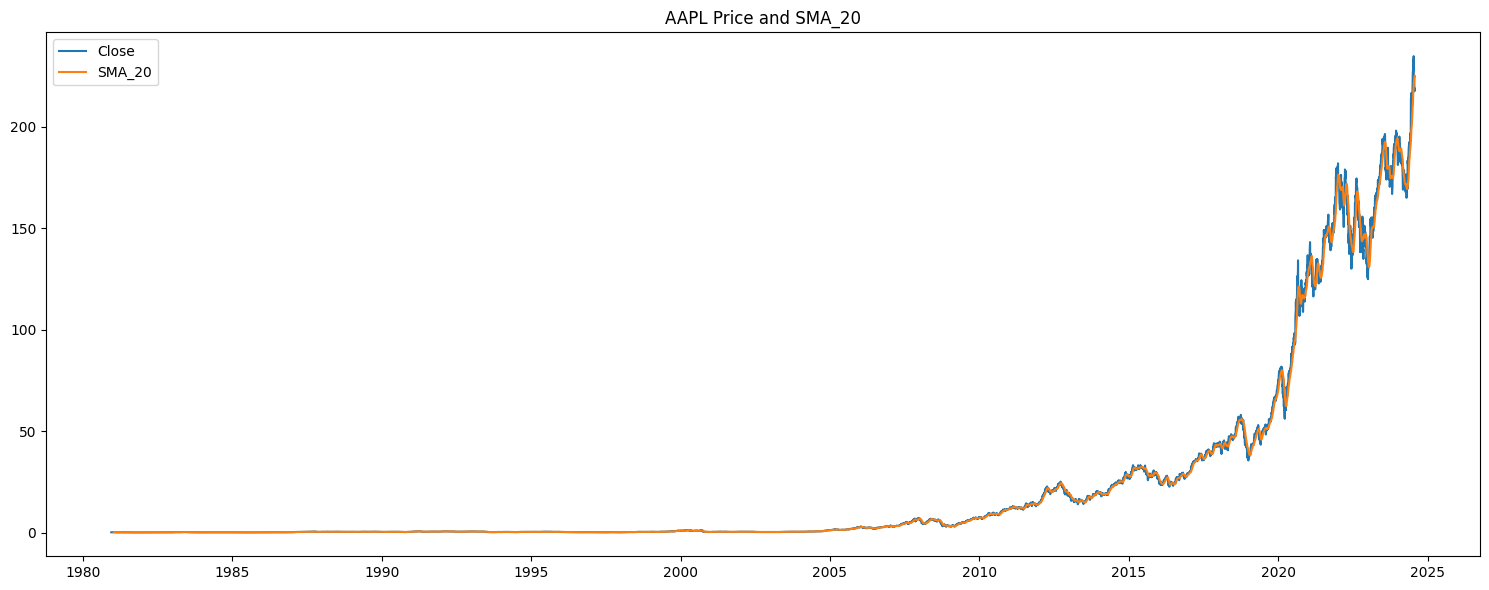

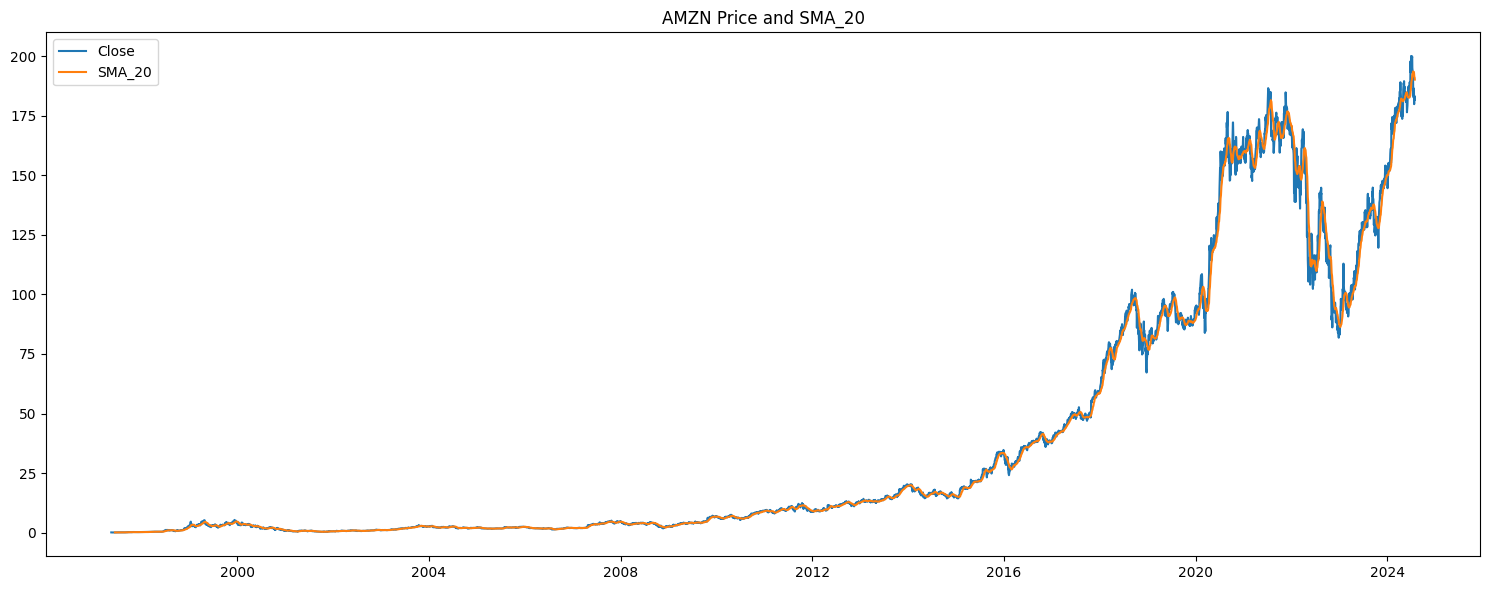

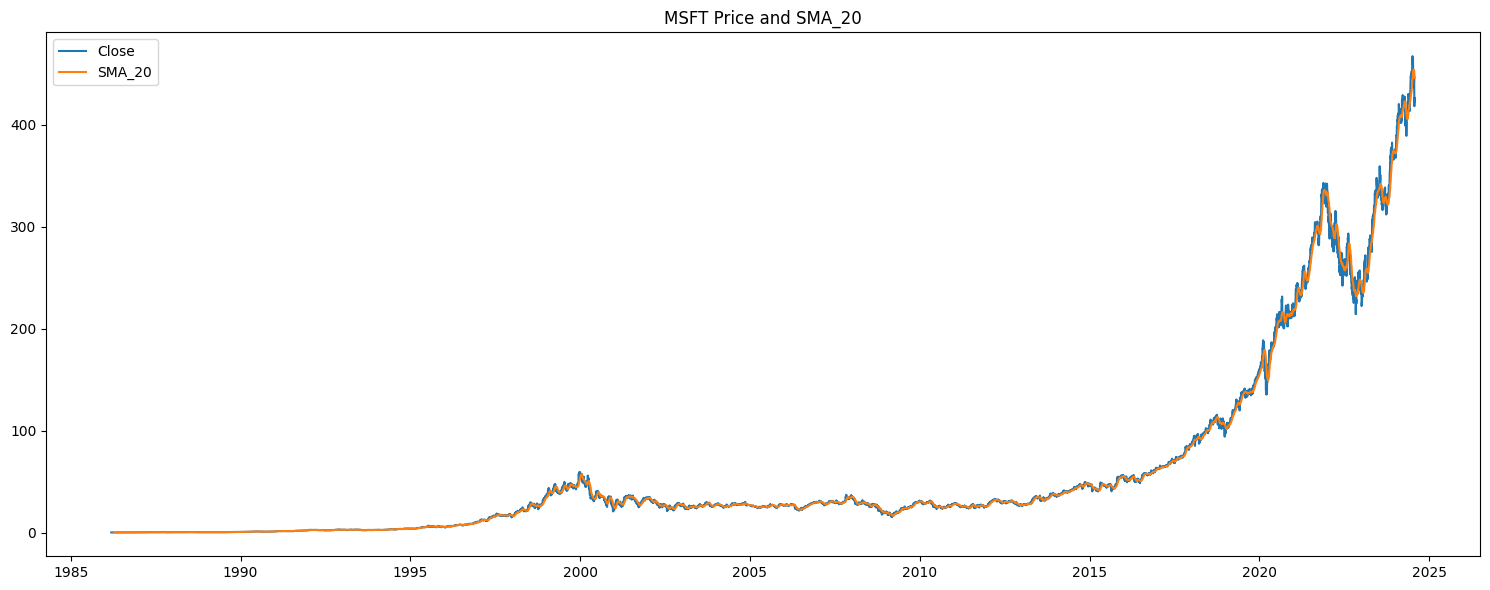

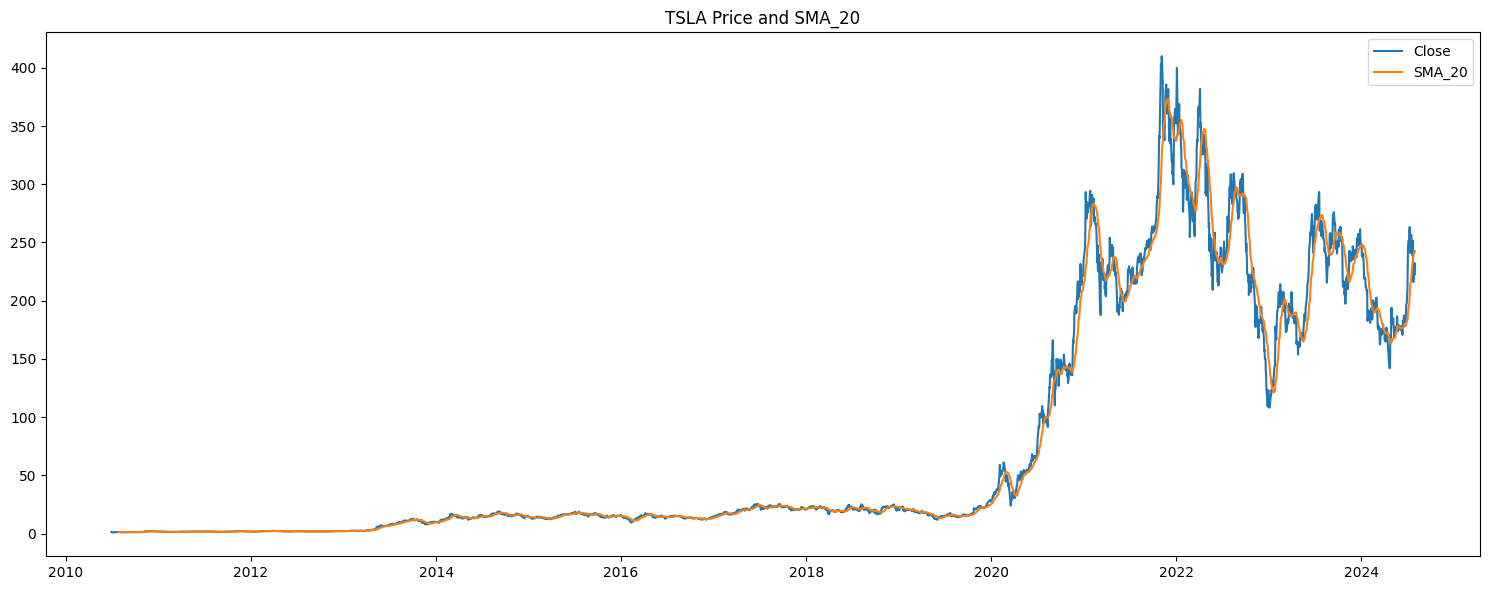

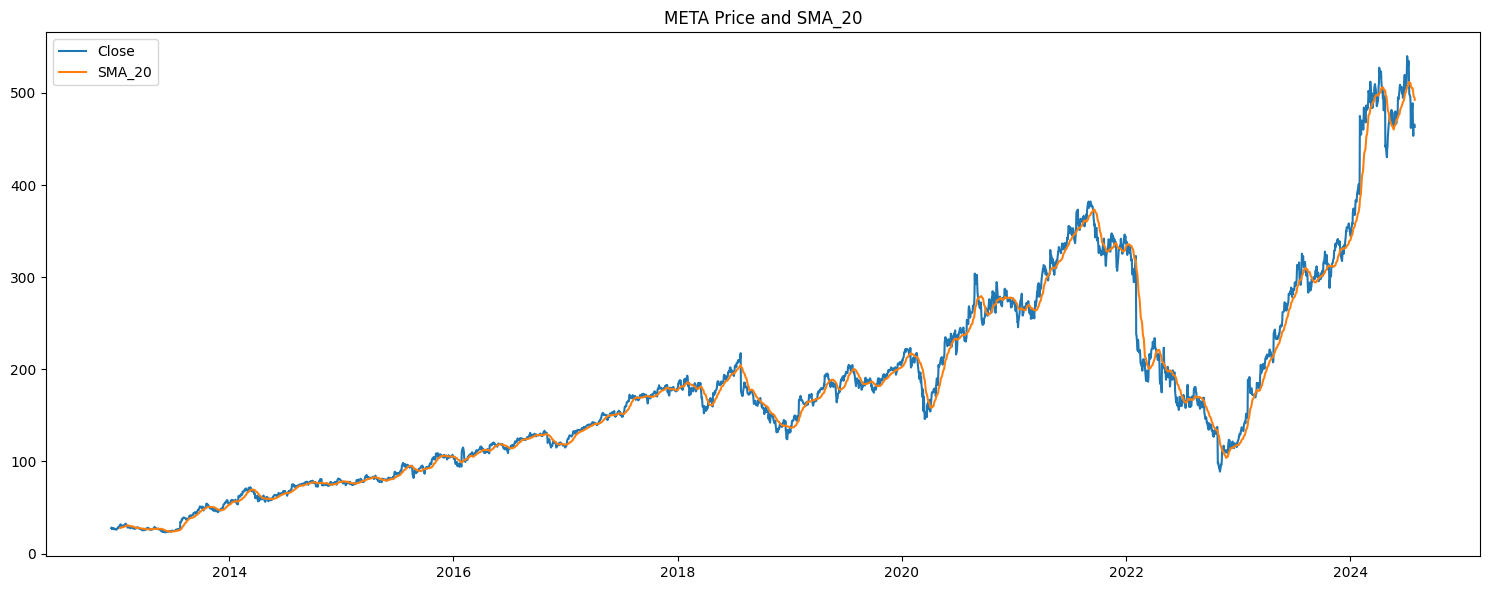

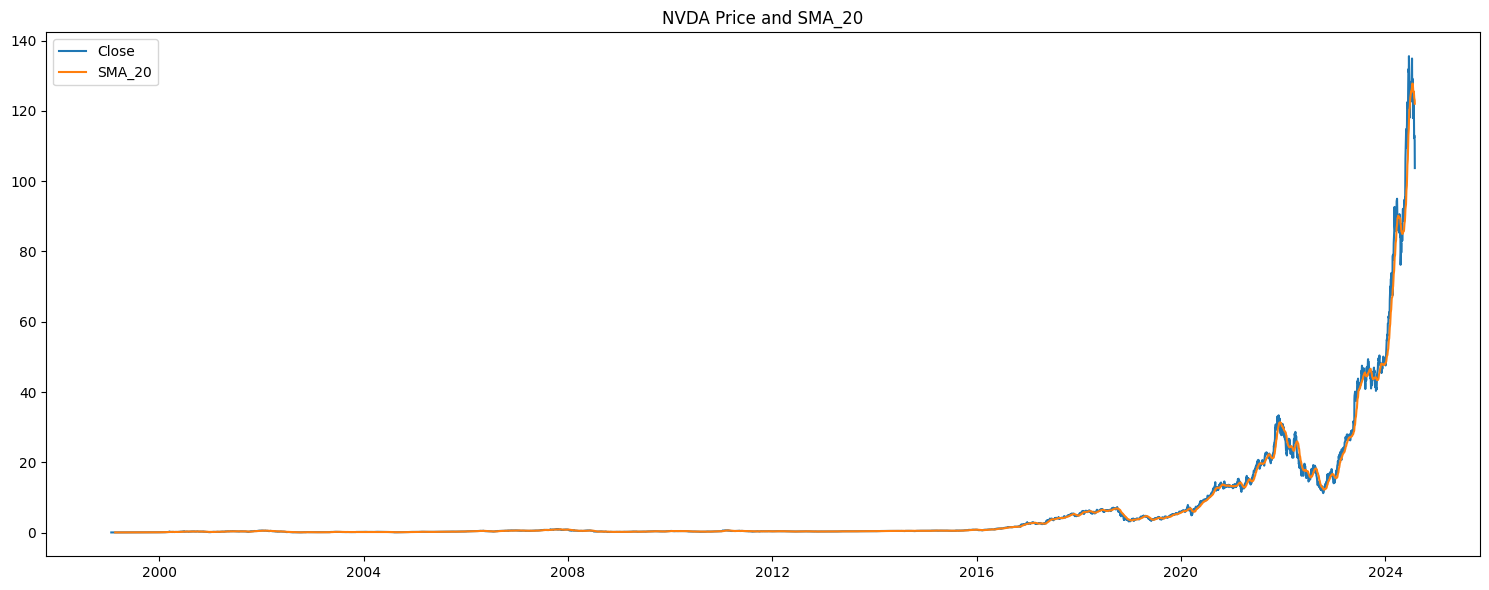

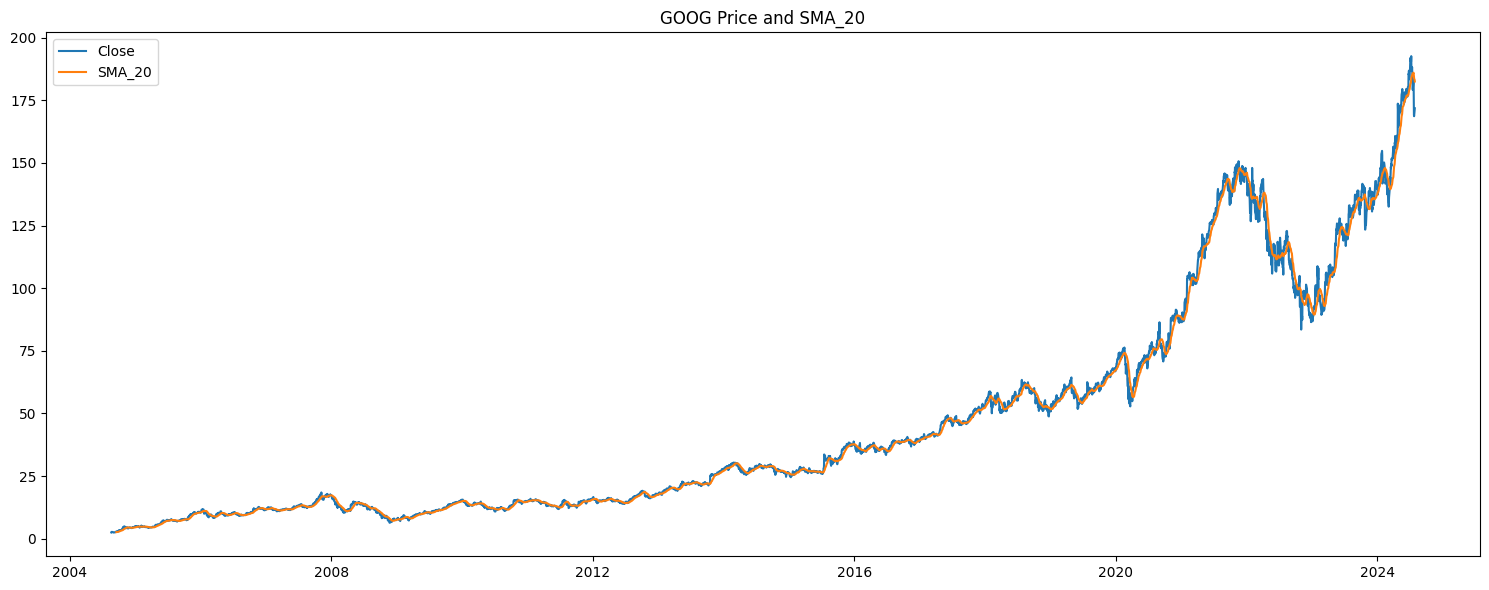

In [6]:
for ticker, df in stock_data.items():
    plt.figure(figsize=(15,6))
    plt.plot(df['Close'],label='Close')
    plt.plot(df['SMA_20'],label='SMA_20')
    plt.title(f"{ticker} Price and SMA_20")
    plt.legend()
    plt.tight_layout()

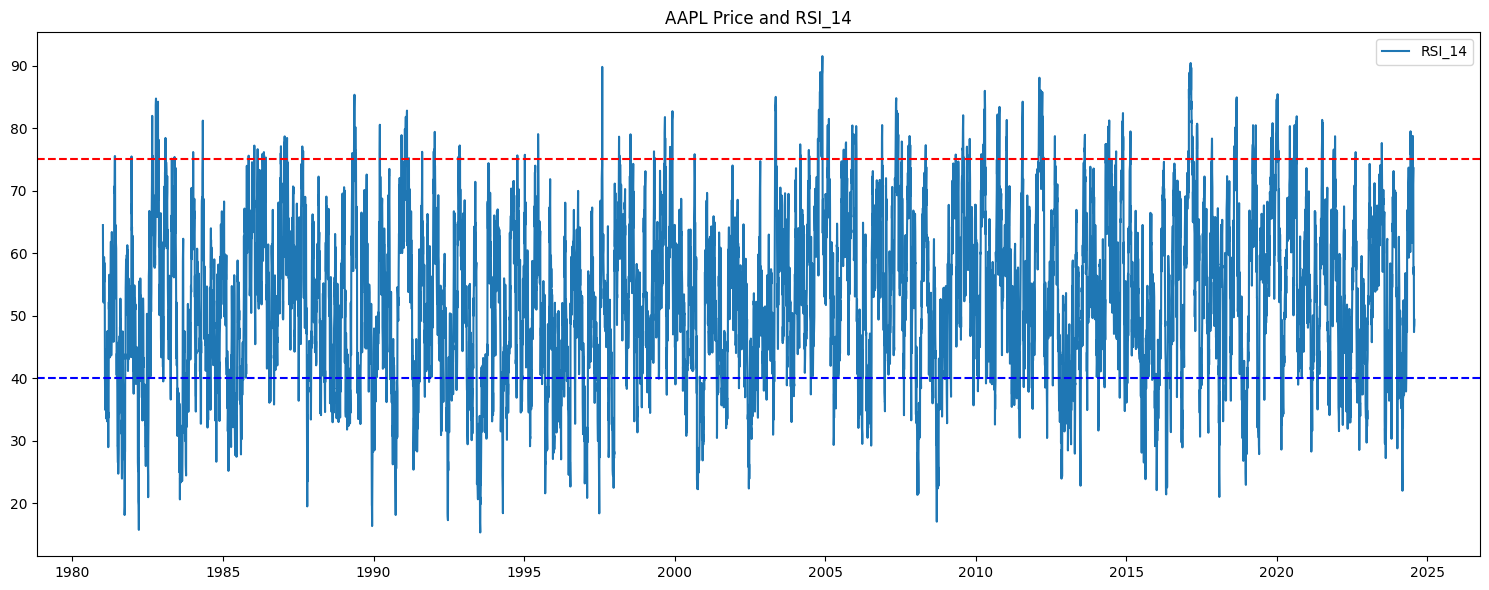

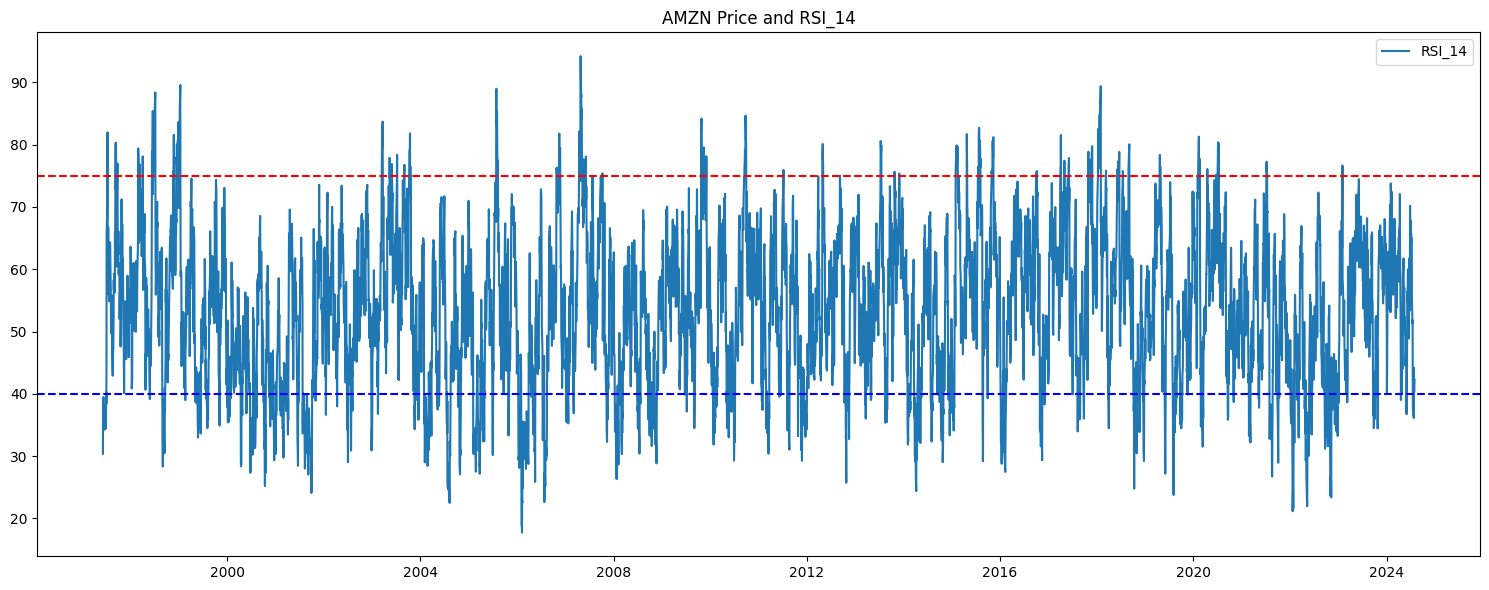

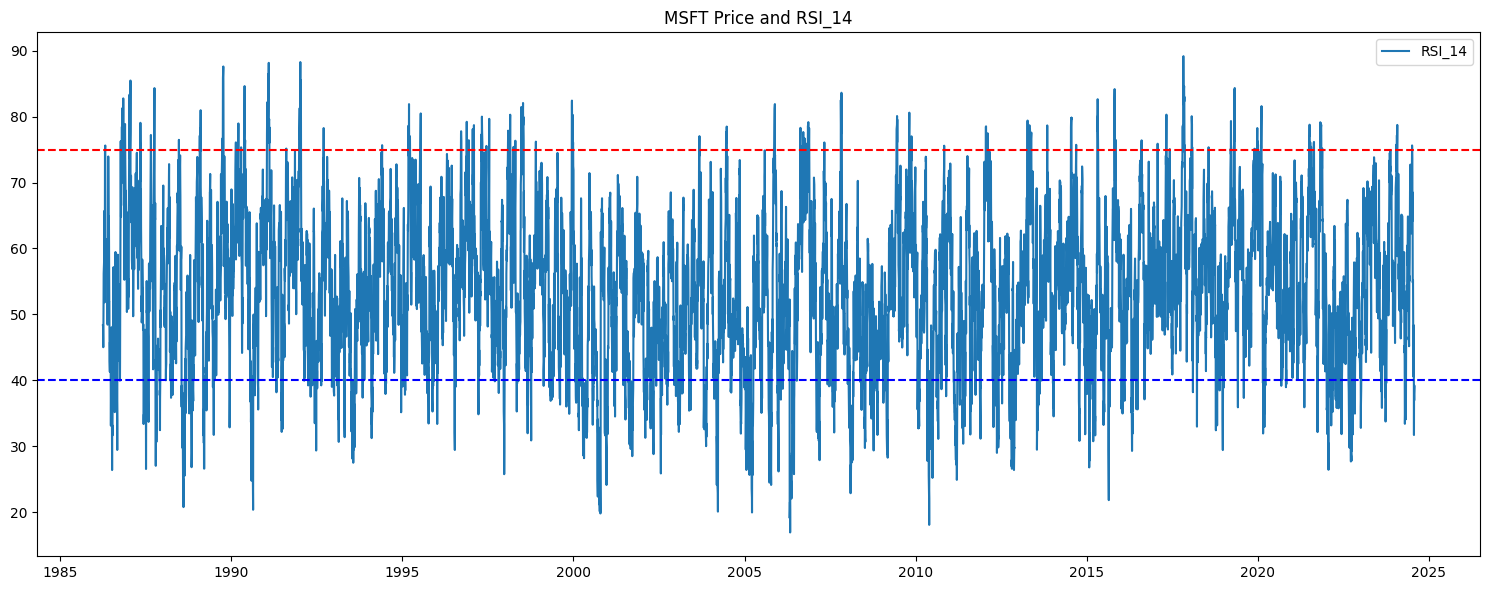

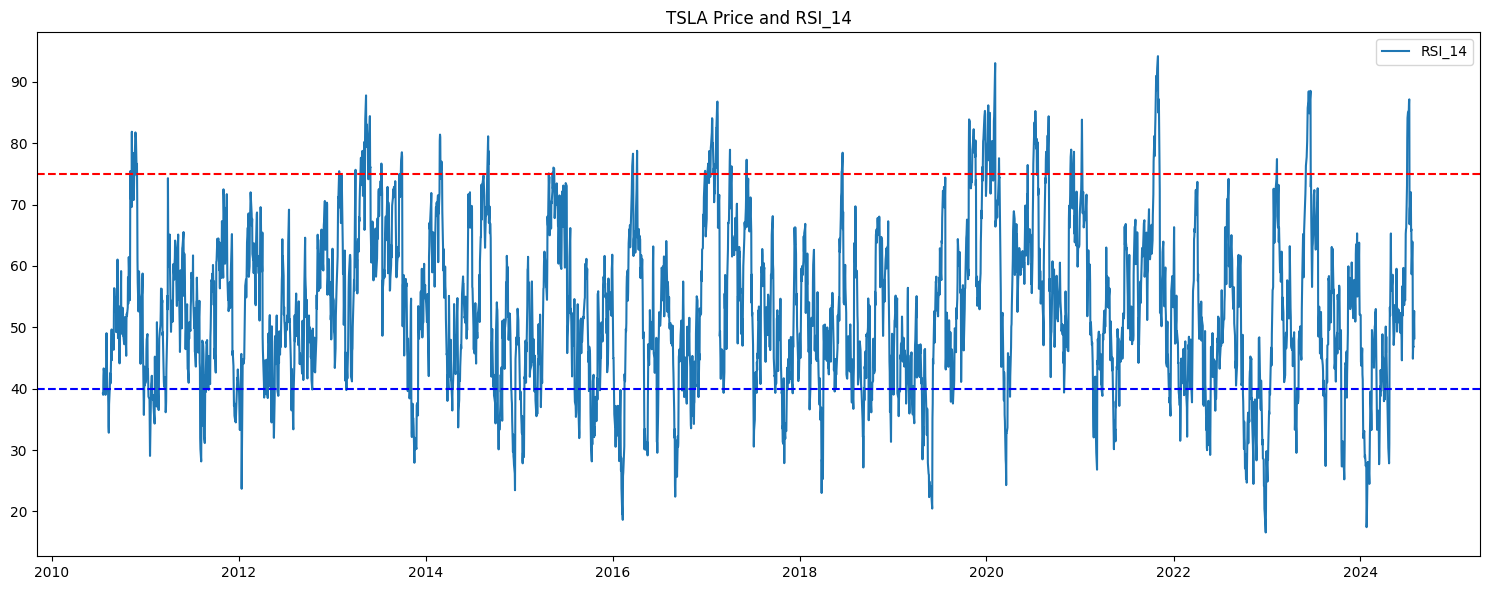

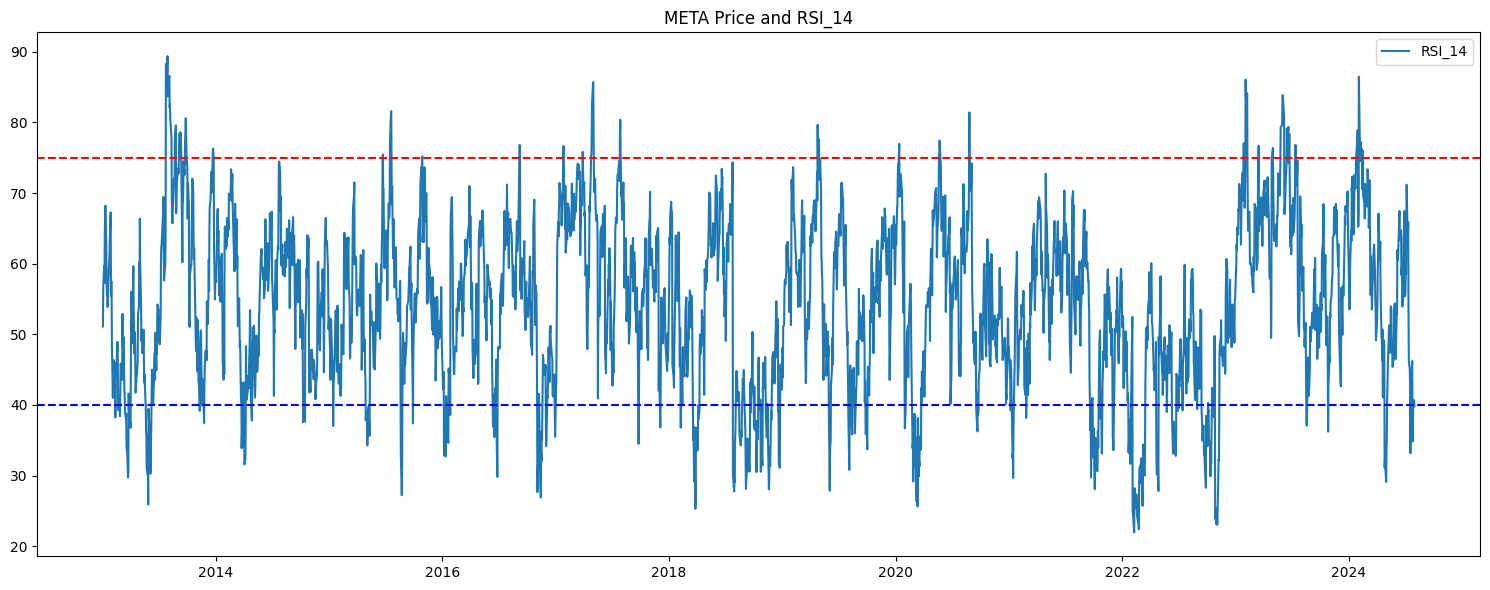

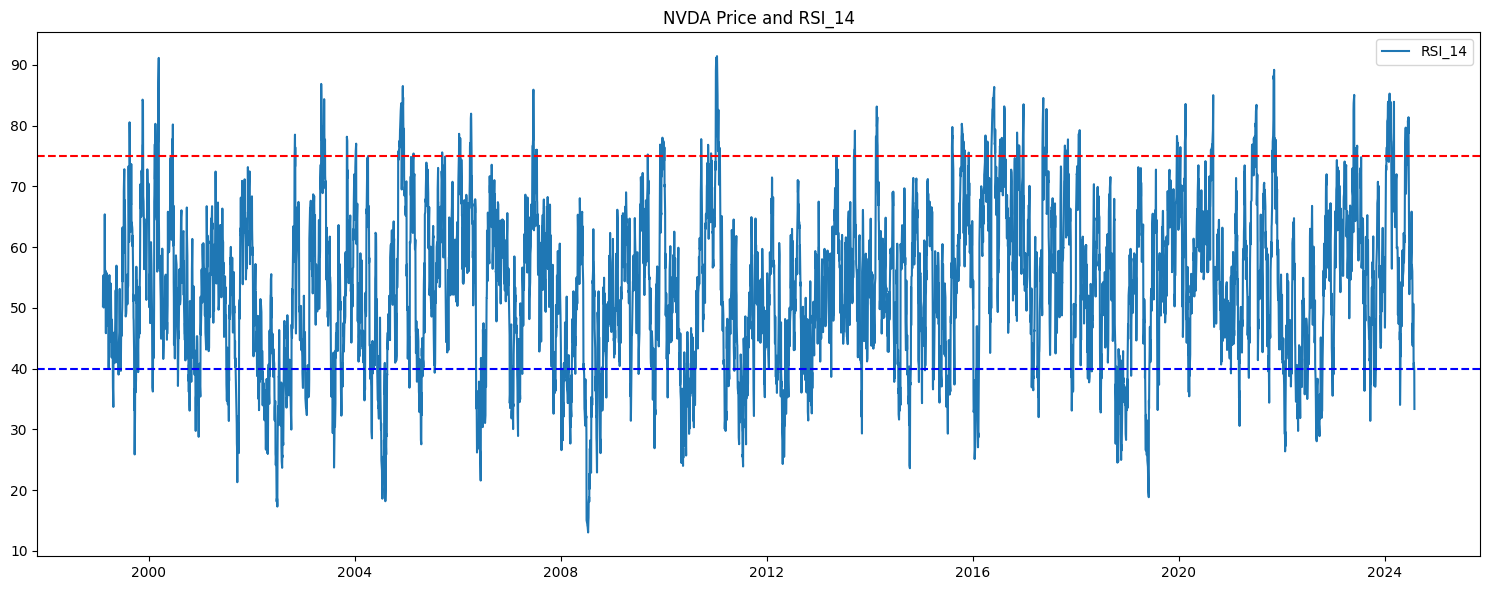

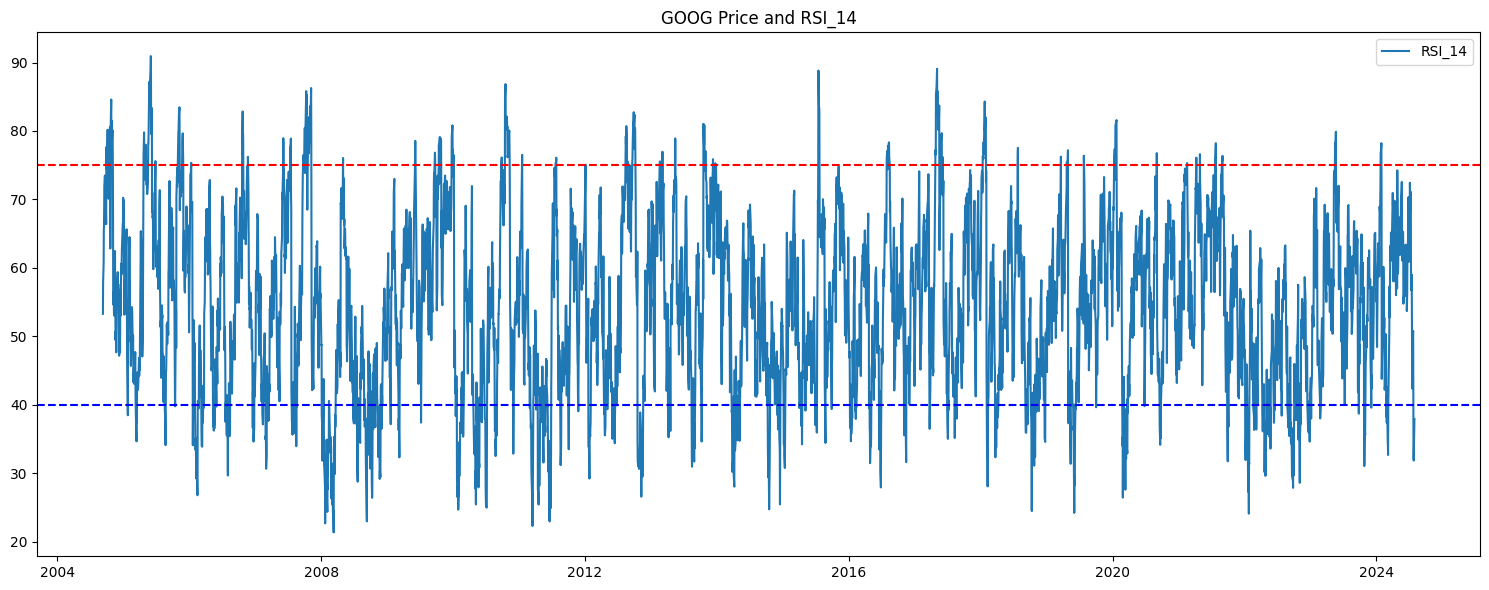

In [7]:
#Commit new changes
for ticker, df in stock_data.items():
    plt.figure(figsize=(15,6))
    plt.plot(df['RSI_14'],label='RSI_14')
    plt.axhline(75,linestyle="--",color='red')
    plt.axhline(40,linestyle="--",color="blue")
    plt.title(f"{ticker} Price and RSI_14")
    plt.legend()
    plt.tight_layout()

C:\Users\hp\AppData\Local\Temp\ipykernel_9380\1024637339.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


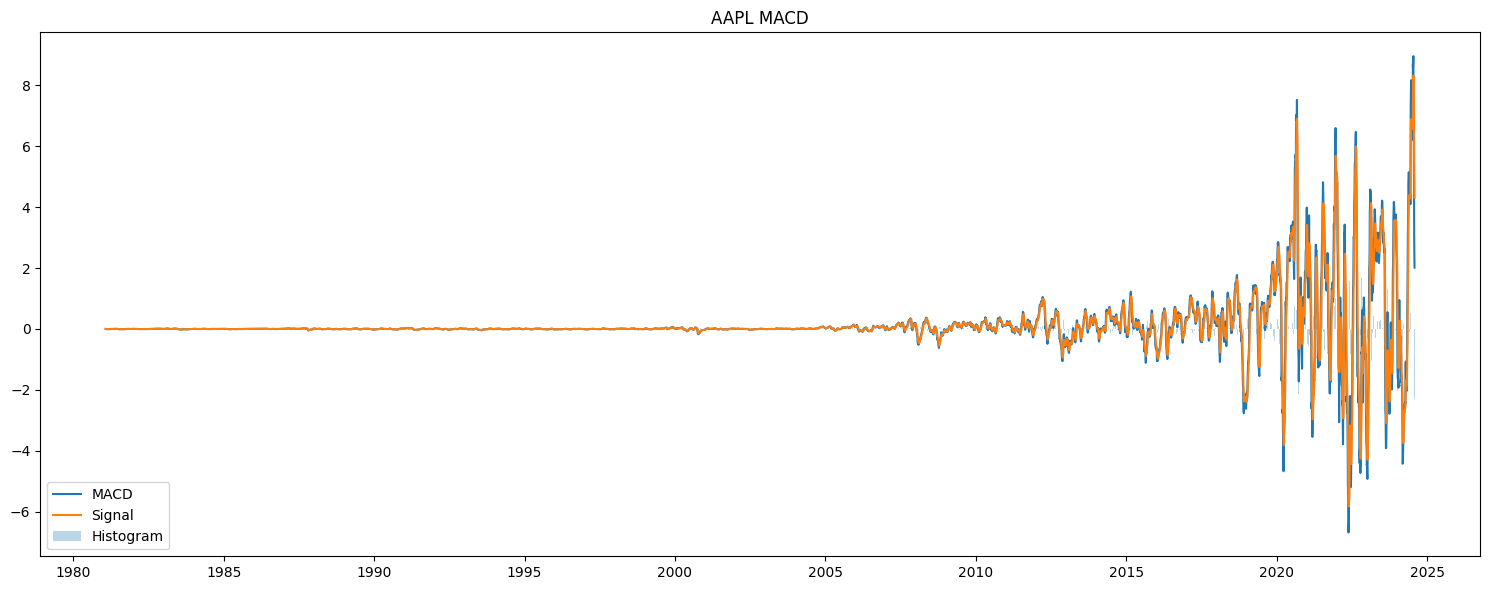

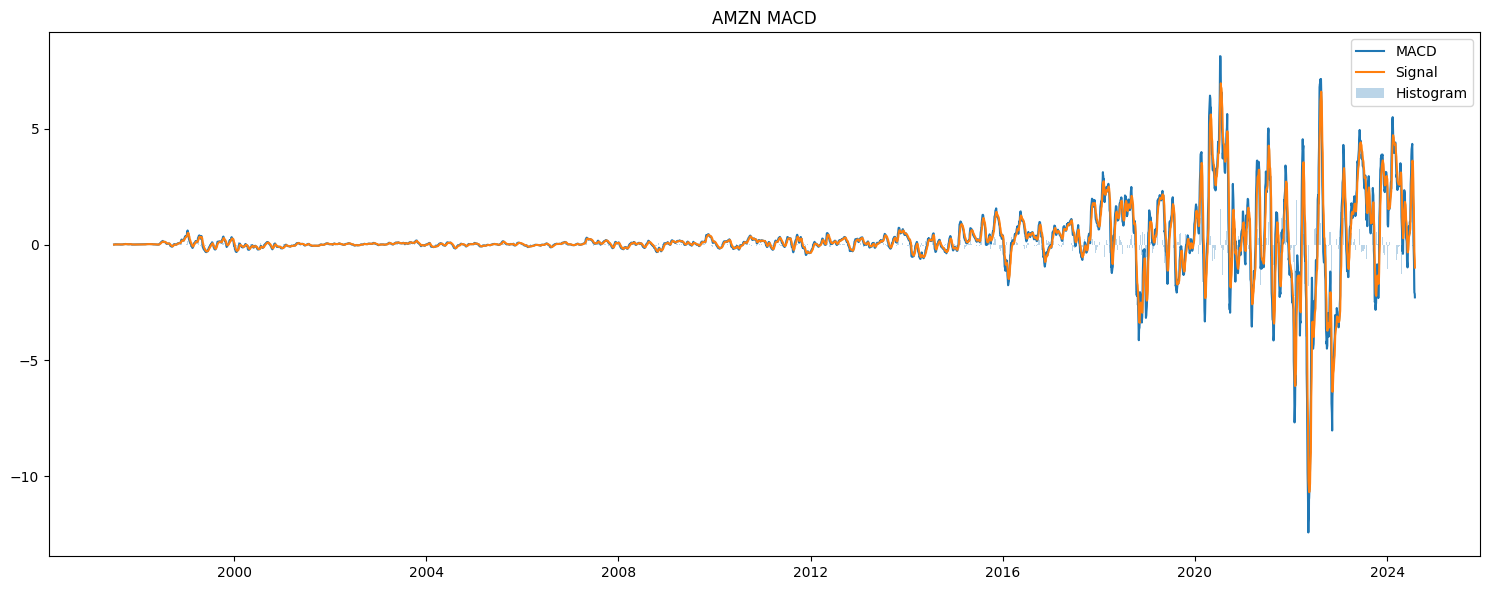

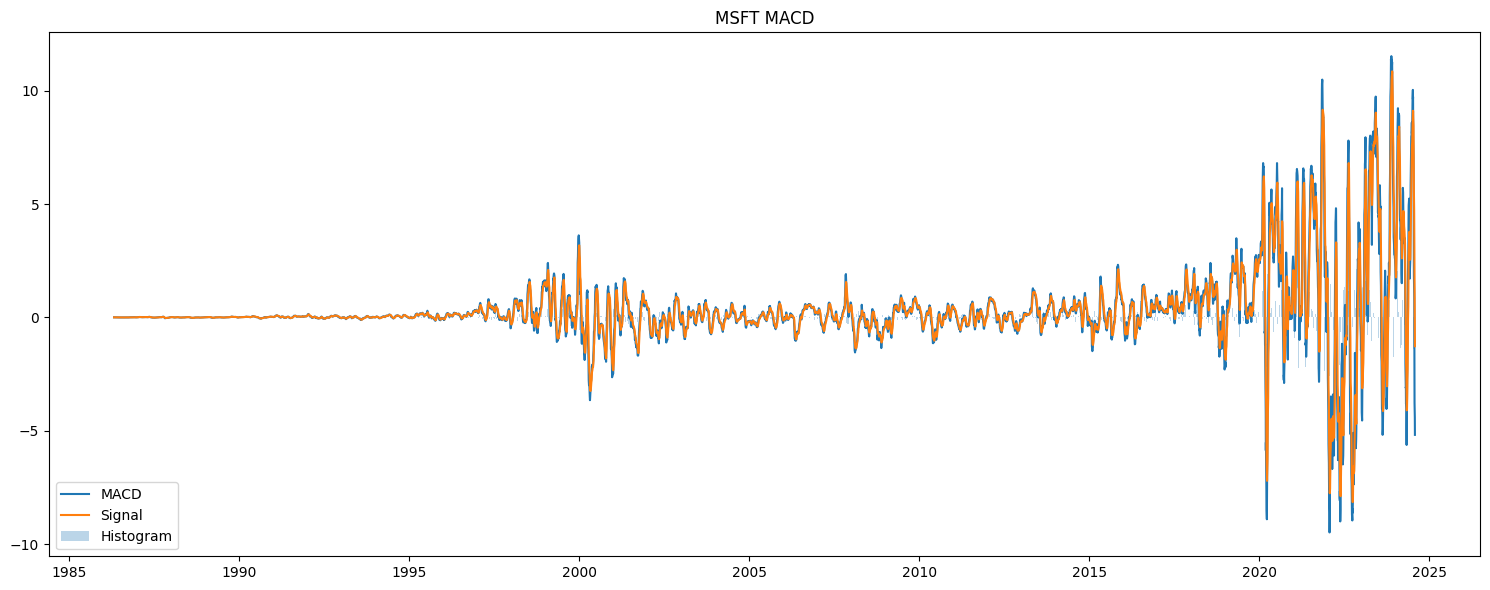

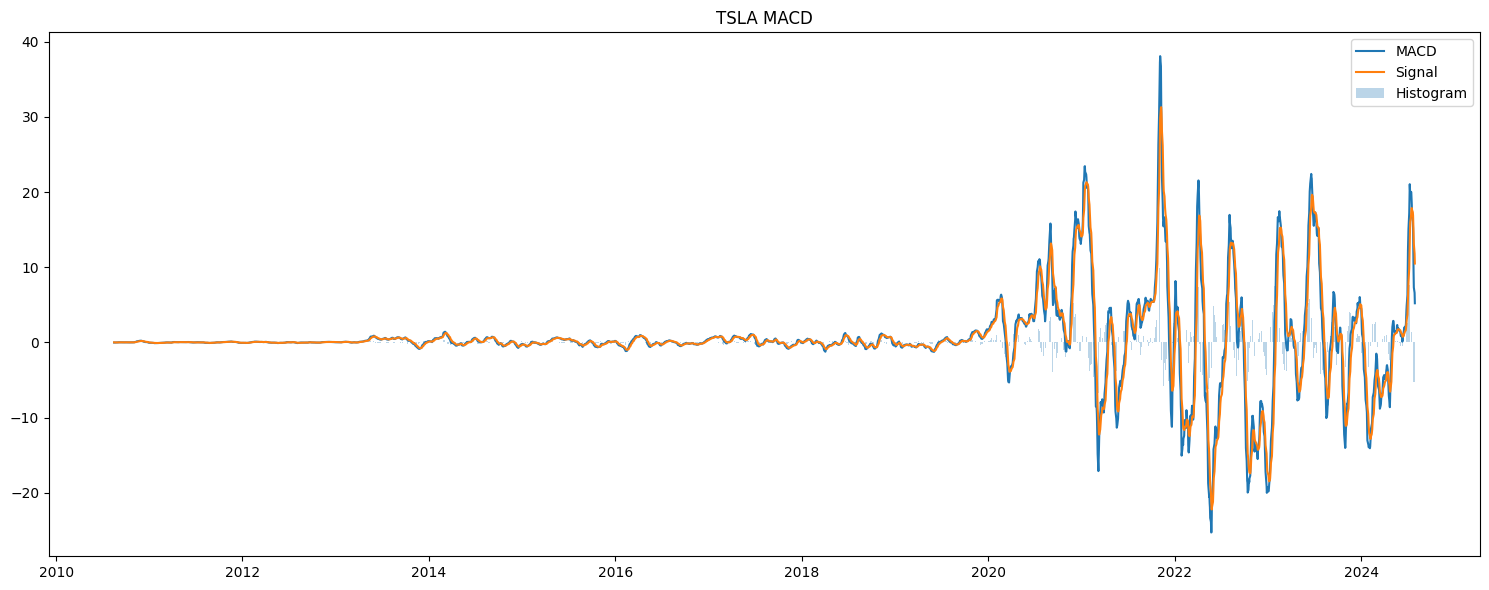

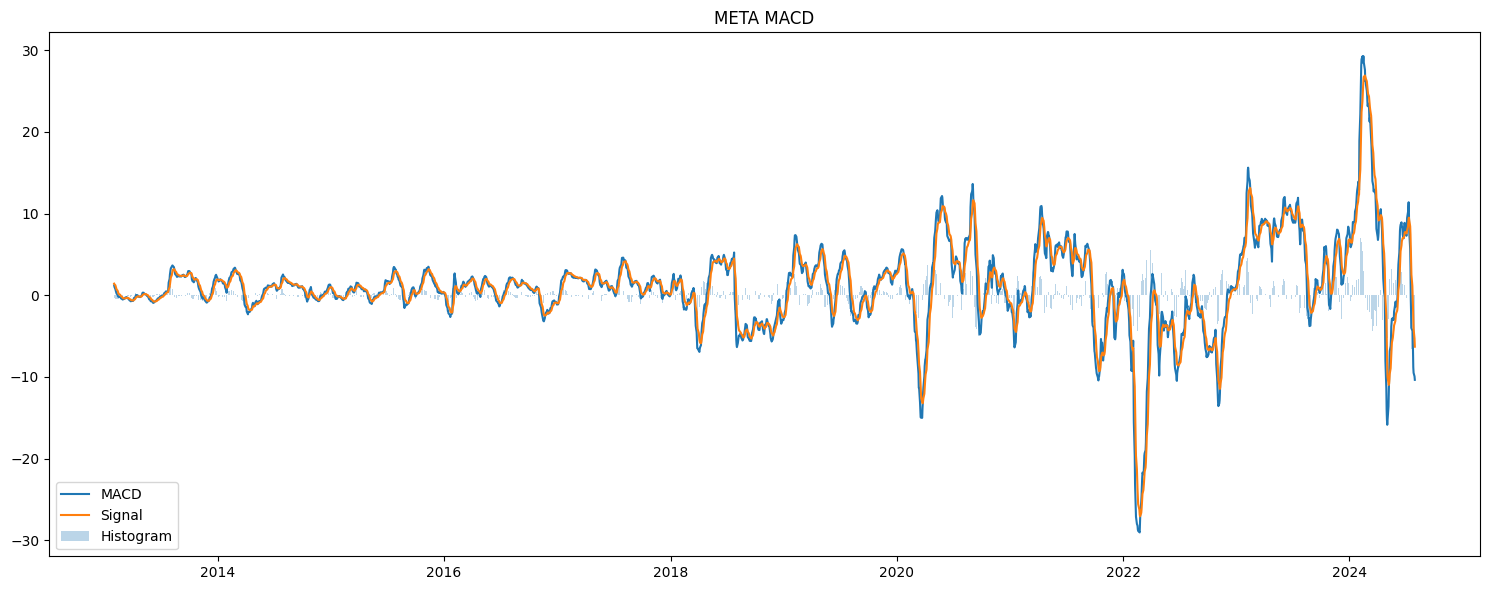

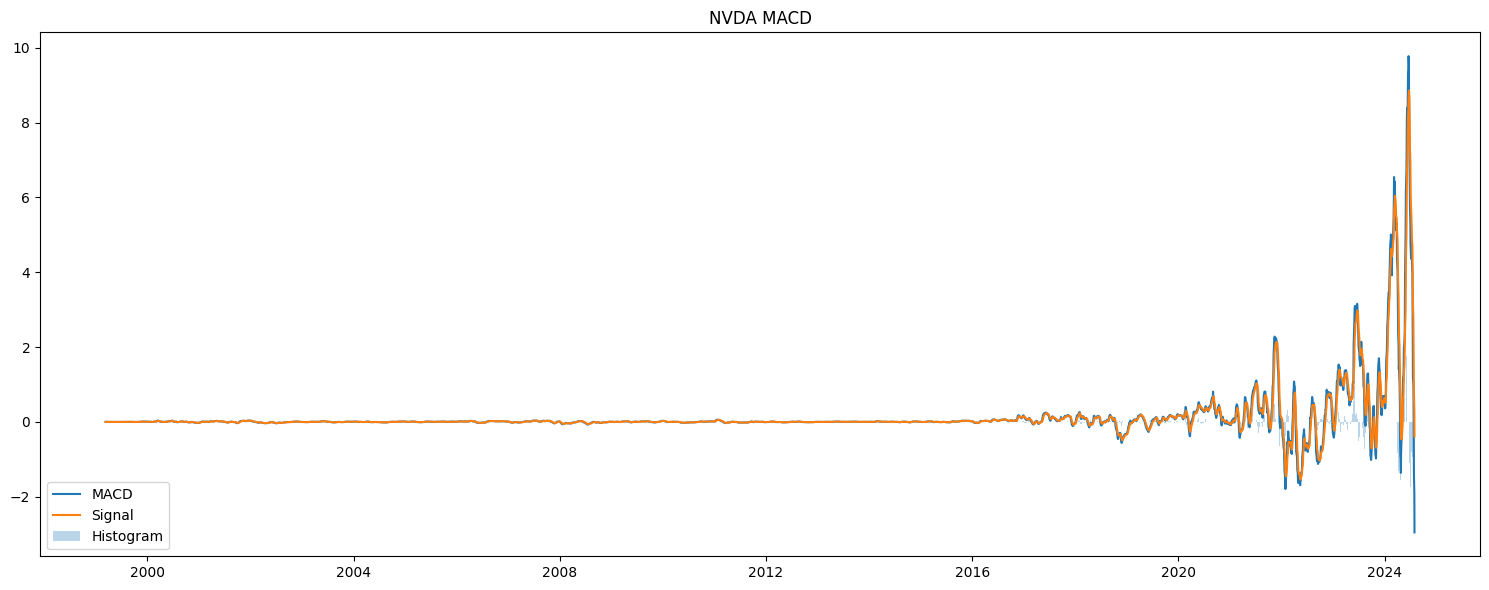

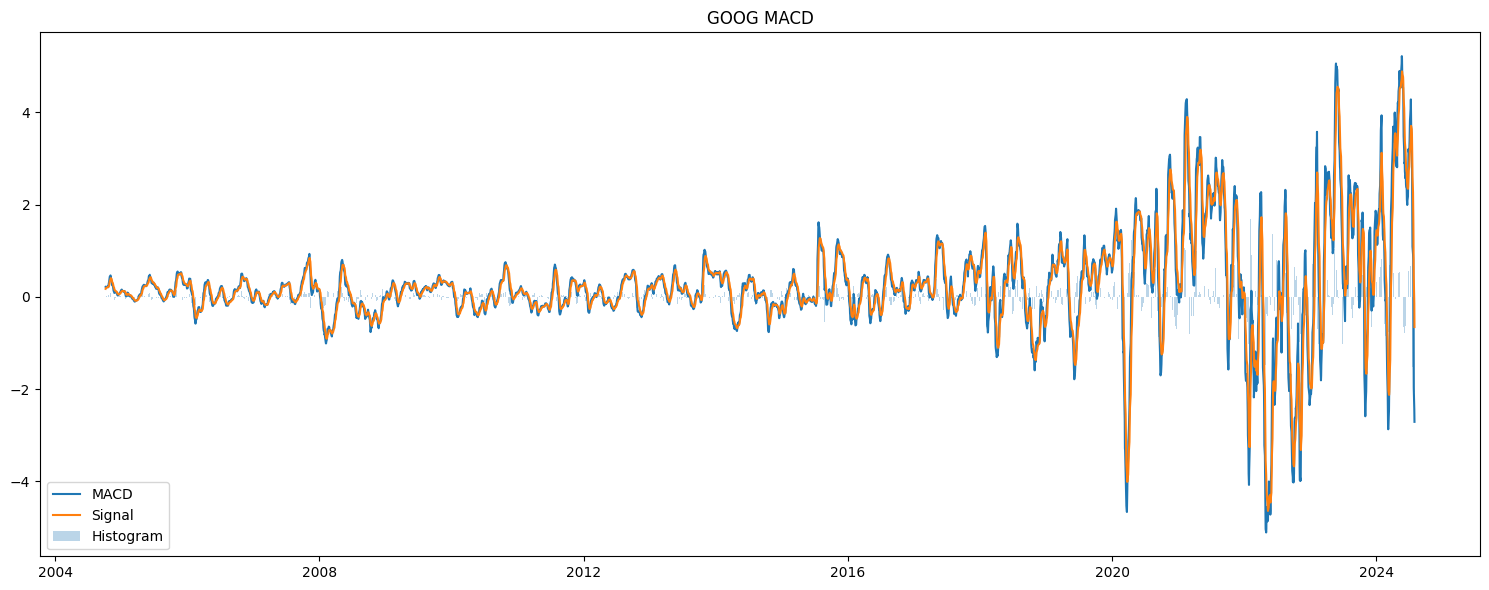

In [8]:
for ticker, df in stock_data.items():
    plt.figure(figsize=(15,6))
    plt.plot(df['MACD'],label='MACD')
    plt.plot(df['MACD_Signal'],label='Signal')
    plt.bar(df.index, df["MACD_Hist"], label='Histogram', alpha=0.3)
    plt.title(f"{ticker} MACD")
    plt.legend()
    plt.tight_layout()

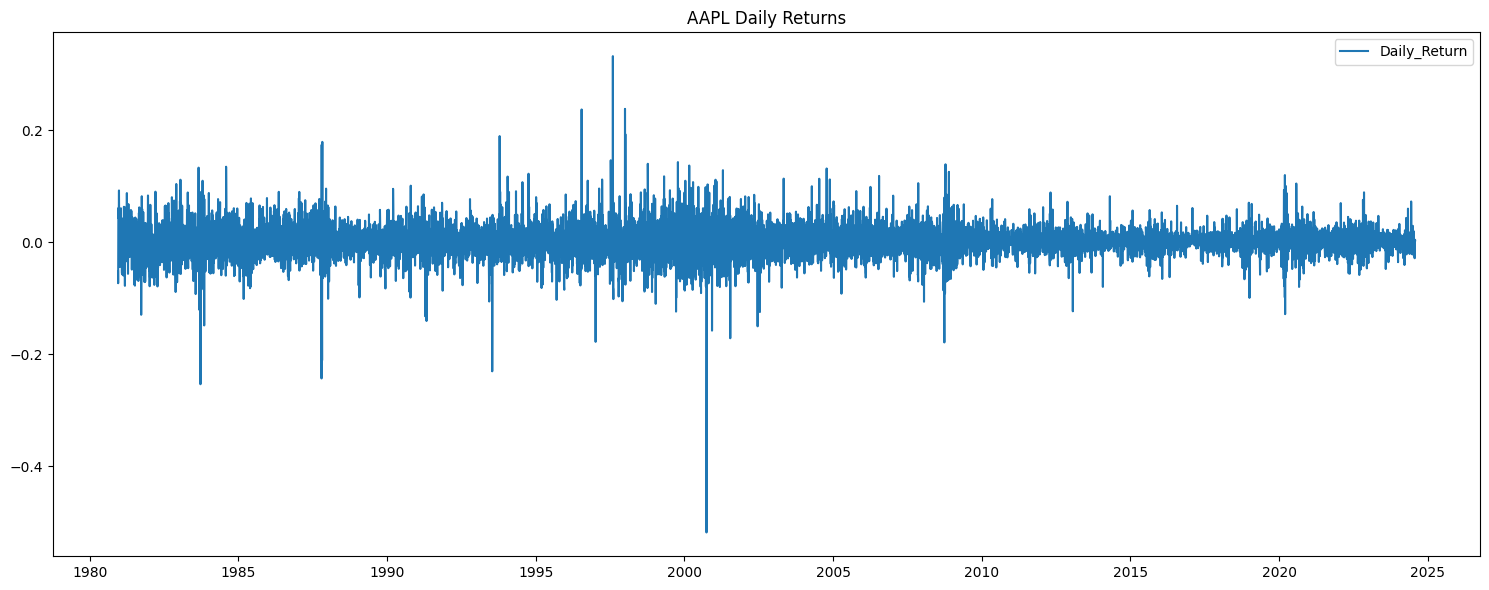

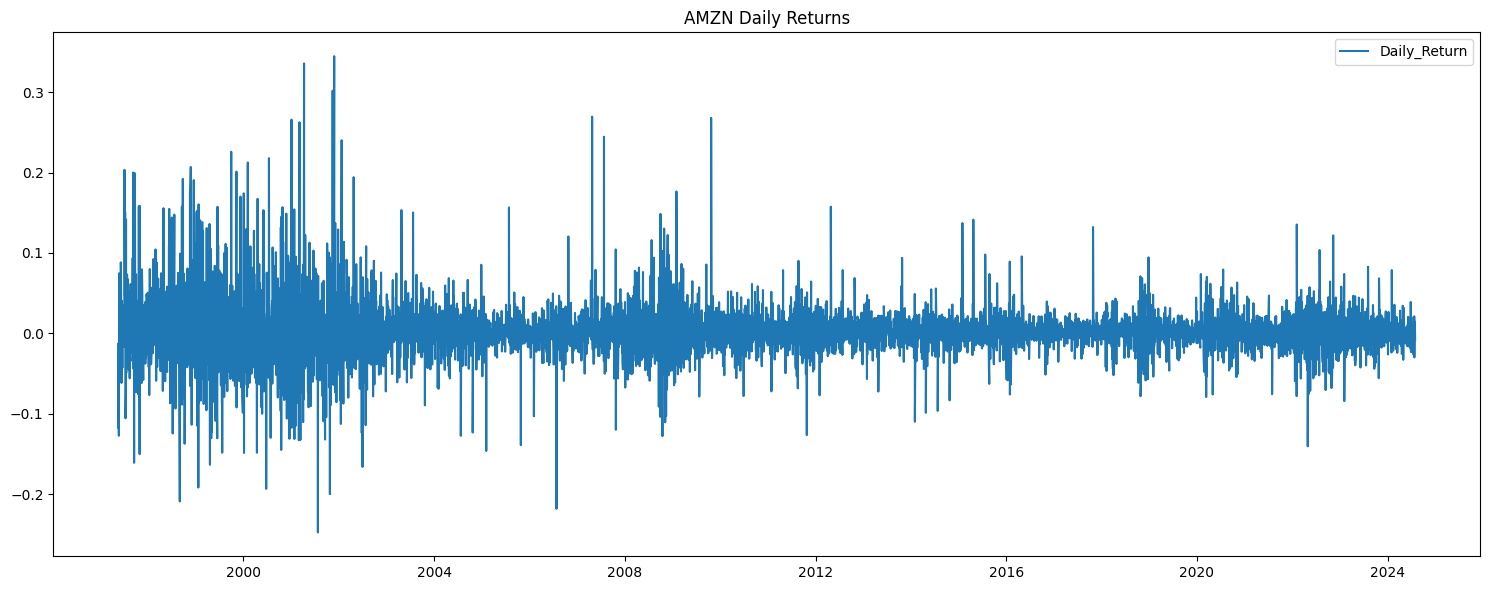

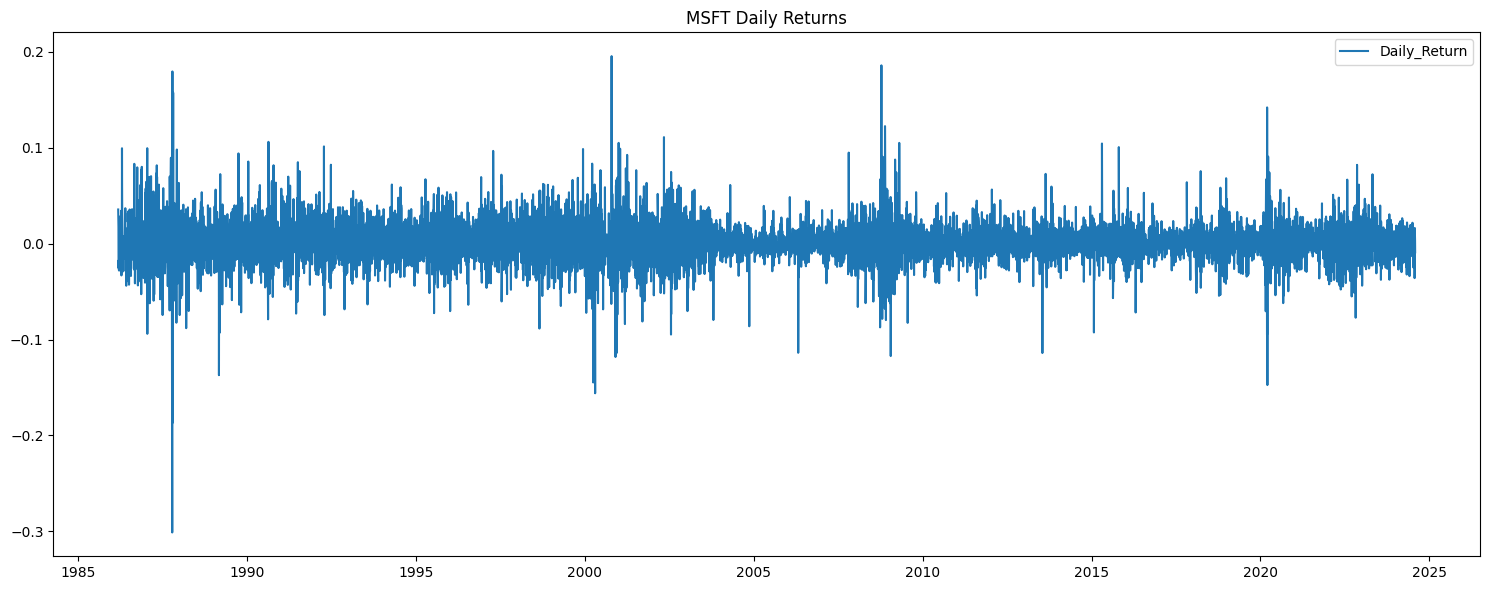

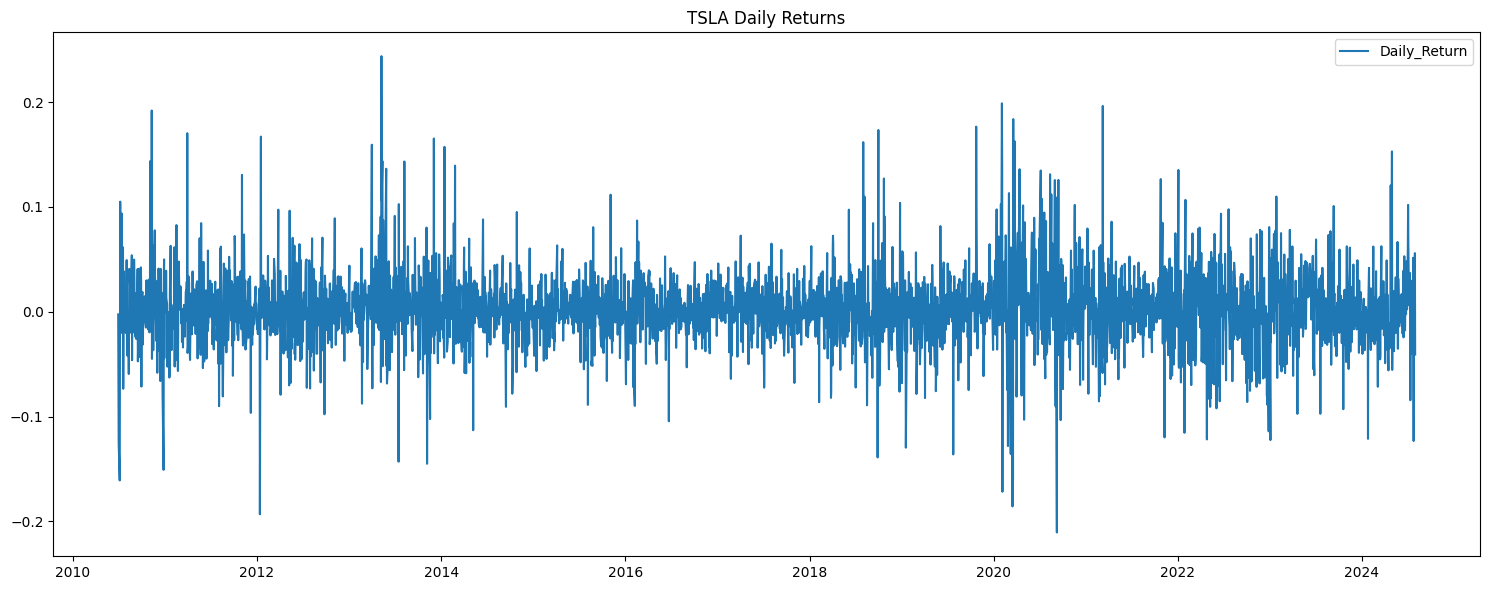

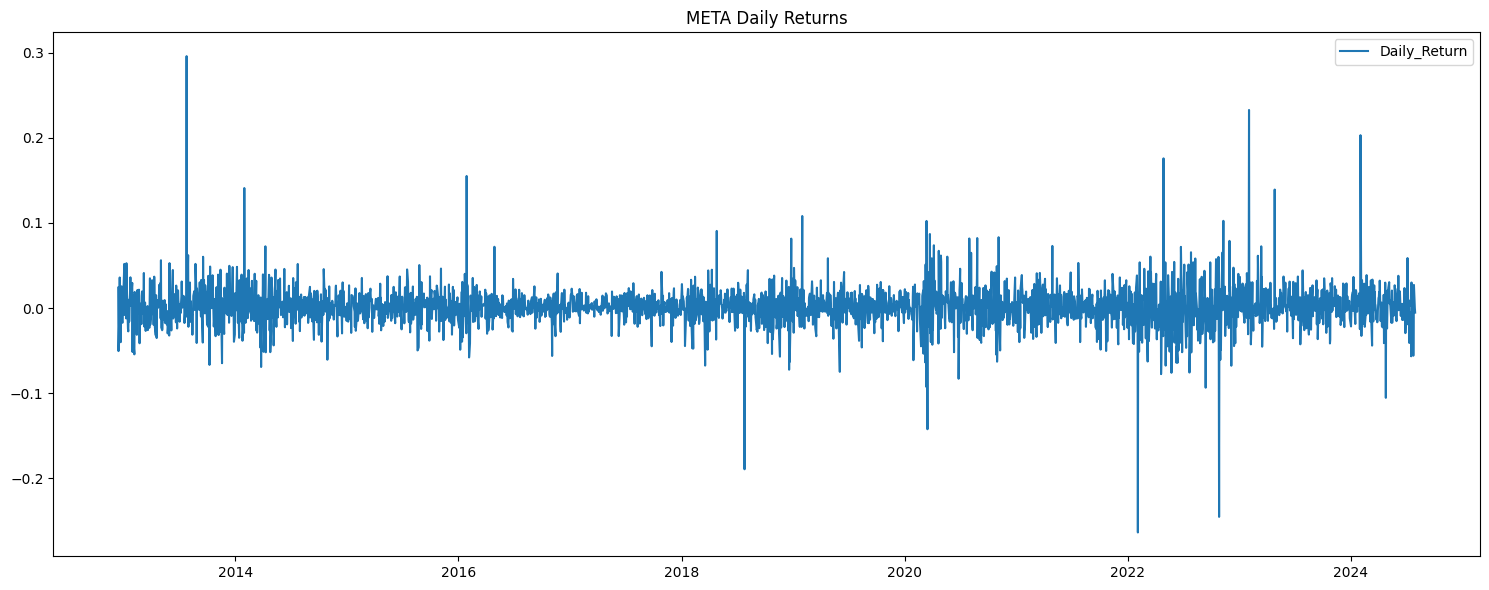

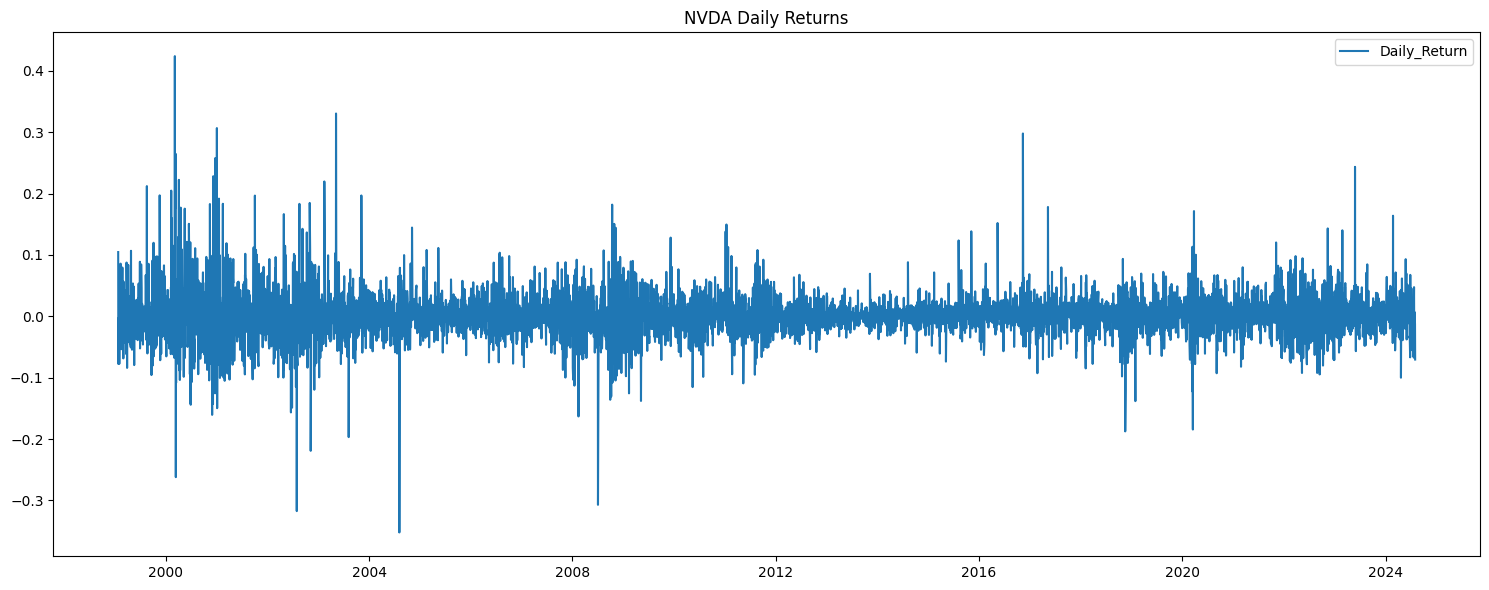

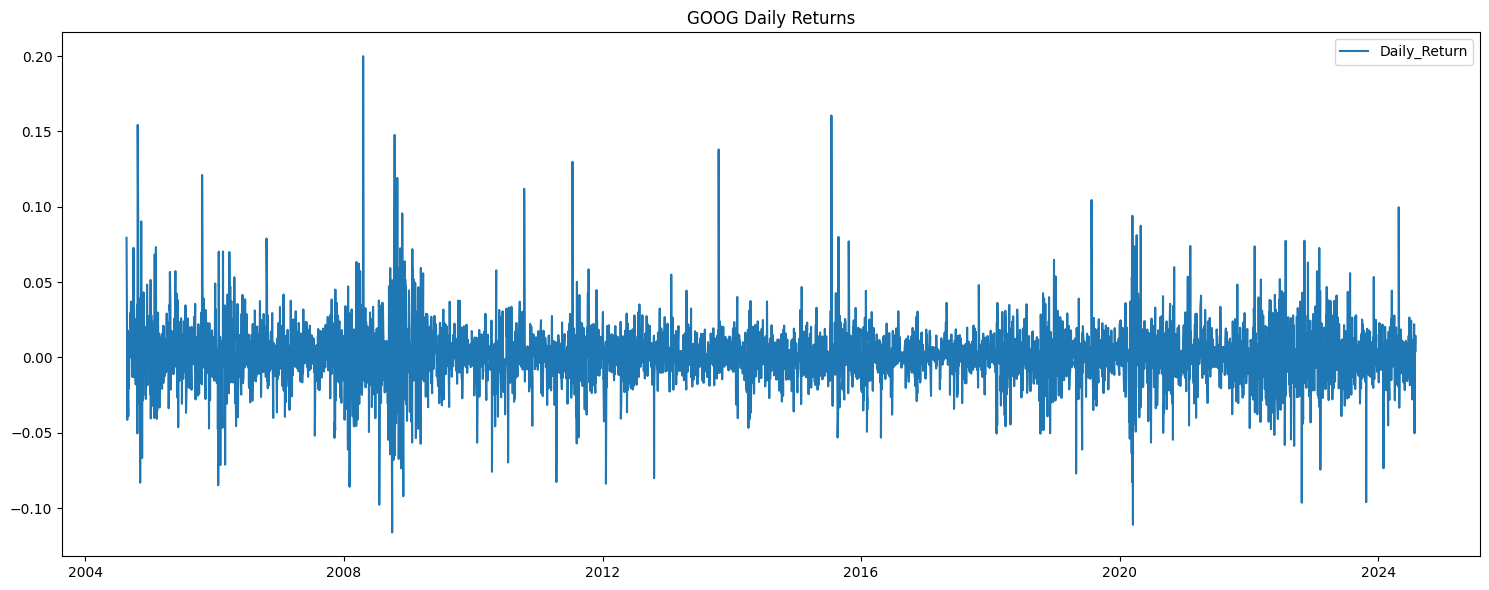

In [9]:
for ticker, df in stock_data.items():
    plt.figure(figsize=(15,6))
    plt.plot(df['Daily_Return'],label='Daily_Return')
    plt.title(f"{ticker} Daily Returns")
    plt.legend()
    plt.tight_layout()

In [13]:
import os

try:
    stock_data = stock_data # Use the existing news_df
except NameError:
    print("stock_data not found, creating dummy for demonstration.")

for ticker, df in stock_data.items():
    file_name = f'{ticker}_stock_data.csv' # e.g., 'AAPL_stock_data.csv'
    full_path = os.path.join('data\Processed_data', file_name)
    df.to_csv(full_path, index=False)
    print(f"Saved {ticker} data to: {full_path}")

<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
C:\Users\hp\AppData\Local\Temp\ipykernel_9380\1524679810.py:10: SyntaxWarning: invalid escape sequence '\P'
  full_path = os.path.join('data\Processed_data', file_name)


Saved AAPL data to: data\Processed_data\AAPL_stock_data.csv
Saved AMZN data to: data\Processed_data\AMZN_stock_data.csv
Saved MSFT data to: data\Processed_data\MSFT_stock_data.csv
Saved TSLA data to: data\Processed_data\TSLA_stock_data.csv
Saved META data to: data\Processed_data\META_stock_data.csv
Saved NVDA data to: data\Processed_data\NVDA_stock_data.csv
Saved GOOG data to: data\Processed_data\GOOG_stock_data.csv
